In [1]:
#Loading neccessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:\\TASK_05\\Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.shape

(200, 5)

In [5]:
df.size

1000

In [7]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
df.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [10]:
# PREPROCESSING THE DATA
# Check for Null Values

df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [11]:
duplicate = df.duplicated().sum()
print(duplicate)

0


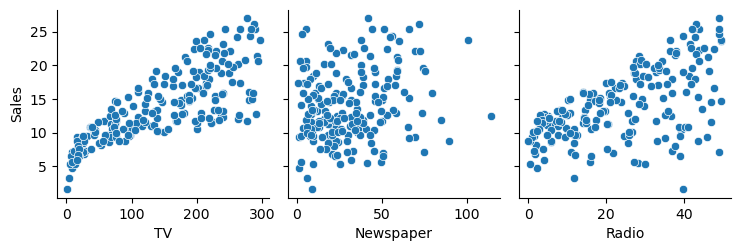

In [13]:
# DATA VISUALIZATION
# ScatterPlot Sales vs TV,Newspaper,Radio

sns.pairplot(df,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',kind='scatter')
plt.show()

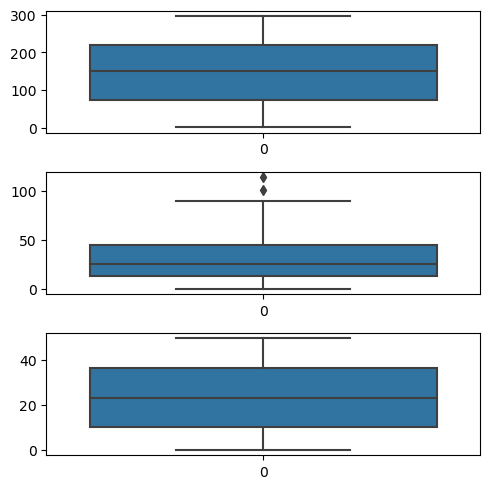

In [14]:
# Checking for outliers

fig, axs  = plt.subplots(3, figsize=(5,5))
plt1 = sns.boxplot(df['TV'], ax=axs[0])
plt1 = sns.boxplot(df['Newspaper'], ax=axs[1])
plt1 = sns.boxplot(df['Radio'], ax=axs[2])
plt.tight_layout()

<Axes: >

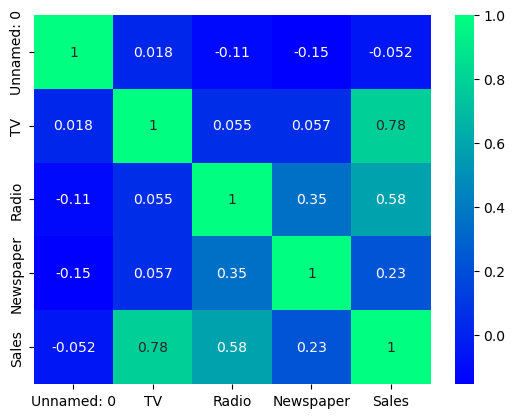

In [15]:
#correaltion visualization

sns.heatmap(df.corr(),annot=True, cmap='winter')

In [17]:
# Prediction of Sales using LinearRegression

x = df.drop('Sales',axis=1)
x

,Unnamed: 0,TV,Radio,Newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4
...,...,...,...,...
195,196,38.2,3.7,13.8
196,197,94.2,4.9,8.1
197,198,177.0,9.3,6.4
198,199,283.6,42.0,66.2


In [18]:
y = df['Sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [19]:
# Splitting the data for training and testing, considering 80% of the data for training and 20% for testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

In [20]:
# Fitting the model to the dataset

from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [21]:
# Prediction

y_predictions=model.predict(X_test)
y_predictions

array([10.24664397,  7.3067958 ,  7.01313011, 24.0629912 , 11.84538583,
        6.3623126 , 12.97367539, 15.01392577, 10.95137181, 16.2302401 ,
       22.94764396,  9.07892877, 10.29830431, 15.372556  , 11.63358138,
       12.38729183, 18.91996453, 10.72601207, 16.03372676, 17.36589369,
       23.85225051,  9.51048184, 15.25366204, 12.2528663 ,  5.81346738,
       15.19998588, 12.12398331, 20.74762723, 13.36651757,  9.16548788,
       13.0430809 , 21.47977498, 18.01828076, 21.14170908,  6.74096317,
        5.9527019 ,  7.82515133, 13.21661502, 14.72150697,  6.18172688])

In [23]:
print("The intercept is:",model.intercept_)
print("The coefficients are:",model.coef_)

The intercept is: 3.241969367214139
The coefficients are: [-0.00222187  0.0445384   0.1962548  -0.00319076]


In [24]:
act_predict=pd.DataFrame({
    'Actual':y_test.values.flatten(),
    'Predict':y_predictions.flatten()})
act_predict.head(10)

,Actual,Predict
0,11.3,10.246644
1,8.4,7.306796
2,8.7,7.013130
3,25.4,24.062991
4,11.7,11.845386
5,8.7,6.362313
6,7.2,12.973675
7,13.2,15.013926
8,9.2,10.951372
9,16.6,16.230240


In [25]:
# Model evaluation

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("The Mean_absolute_error:",mean_absolute_error(y_test,y_predictions))
print("The Mean_squared_error:",mean_squared_error(y_test,y_predictions))
print("The Squre_Mean_absolute_error:",np.sqrt(mean_absolute_error(y_test,y_predictions)))
print("The r2_score:",r2_score(y_test,y_predictions))

The Mean_absolute_error: 1.4158480868317485
The Mean_squared_error: 4.51648782221942
The Squre_Mean_absolute_error: 1.1898941494232789
The r2_score: 0.856480214327925
